In [1]:
#!pip install numpy
#!pip install scipy
#!pip install torch
#!pip install torch_geometric
#!pip install matplotlib
#!pip install scikit-learn
#!pip install pandas
#!pip install git+https://github.com/alitwinkumar/connectome_tools.git

In [2]:
#!pip freeze > requirements.txt

In [3]:
# Install required packages.
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
    

In [4]:
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [73]:
from connectome_tools import load_flywire
# Use connectome_loaders to import FlyWire neurons 
neurons, _ = load_flywire('FlyWire_data/') # datapath to FlyWire 
neurons

,root_id,group,nt_type,nt_type_score,da_avg,ser_avg,gaba_avg,glut_avg,ach_avg,oct_avg,...,class,sub_class,cell_type,hemibrain_type,hemilineage,side,nerve,J_idx,J_idx_post,J_idx_pre
0,720575940596125868,LO.LOP,ACH,0.57,0.03,0.00,0.05,0.28,0.57,0.07,...,NaN,NaN,T5c,NaN,NaN,right,NaN,0,0,0
1,720575940597856265,ME,ACH,0.85,0.01,0.00,0.03,0.04,0.85,0.07,...,NaN,NaN,Tm16,NaN,NaN,right,NaN,1,1,1
2,720575940597944841,ME.LO,ACH,0.82,0.02,0.00,0.01,0.05,0.82,0.09,...,NaN,NaN,CB3851,NaN,NaN,right,NaN,2,2,2
3,720575940598267657,ME,GABA,0.74,0.01,0.01,0.74,0.19,0.03,0.02,...,NaN,NaN,TmY15,NaN,NaN,right,NaN,3,3,3
4,720575940599333574,ME,ACH,0.61,0.02,0.00,0.13,0.13,0.61,0.11,...,NaN,NaN,Tm1,NaN,NaN,right,NaN,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139250,720575940661335681,GNG,GABA,0.71,0.00,0.00,0.71,0.17,0.11,0.00,...,NaN,NaN,CB0180,NaN,MX12__prim,left,NaN,139250,139250,139250
139251,720575940661336193,ME.LO,ACH,0.62,0.02,0.00,0.18,0.16,0.62,0.03,...,NaN,NaN,TmY3,NaN,NaN,left,NaN,139251,139251,139251
139252,720575940661337217,SCL.MB_ML,ACH,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,Kenyon_Cell,NaN,NaN,KCab-p,MBp4,left,NaN,139252,139252,139252
139253,720575940661338497,GNG,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,CB0904,NaN,putative_primary,right,PhN,139253,139253,139253


In [74]:
# Import FlyWire connections as an edgelist
connections = pd.read_csv('FlyWire_data/connections.csv')
connections

,pre_root_id,post_root_id,neuropil,syn_count,nt_type
0,720575940629970489,720575940631267655,AVLP_R,7,GABA
1,720575940605876866,720575940606514878,LAL_R,15,GABA
2,720575940627737365,720575940628914436,AL_L,32,ACH
3,720575940633587552,720575940626452879,SMP_R,15,ACH
4,720575940616871878,720575940621203973,AVLP_L,13,GABA
...,...,...,...,...,...
3869873,720575940621773517,720575940611139733,PVLP_R,1,ACH
3869874,720575940622734576,720575940609171395,ICL_L,2,ACH
3869875,720575940638466367,720575940627036426,LO_L,5,ACH
3869876,720575940629789660,720575940631553603,GOR_R,3,ACH


In [76]:
neuropils_of_interest = ['LH_L']
connections = connections[connections['neuropil'].isin(neuropils_of_interest)]

lh_neurons = list(np.unique(list(connections['pre_root_id']) + list(connections['post_root_id']))) # Subselect neurons in neuropil of interest
neurons = neurons[neurons['root_id'].isin(lh_neurons)]

In [78]:
neurons

,root_id,group,nt_type,nt_type_score,da_avg,ser_avg,gaba_avg,glut_avg,ach_avg,oct_avg,...,class,sub_class,cell_type,hemibrain_type,hemilineage,side,nerve,J_idx,J_idx_post,J_idx_pre
86,720575940602849248,LH.SLP,NaN,0.00,0.01,0.00,0.41,0.46,0.12,0.00,...,NaN,NaN,CB2965,NaN,VLPl4_dorsal,left,NaN,86,86,86
104,720575940602974688,AVLP,ACH,0.80,0.07,0.03,0.04,0.05,0.80,0.00,...,NaN,NaN,CB2377,NaN,LHp2,left,NaN,104,104,104
126,720575940603152998,PLP,GLUT,0.58,0.02,0.00,0.37,0.58,0.03,0.00,...,NaN,NaN,NaN,"WEDPN6B,WEDPN6C",VPNp&v1_posterior,left,NaN,126,126,126
127,720575940603167916,LH.AVLP,GLUT,0.59,0.06,0.01,0.32,0.59,0.01,0.00,...,NaN,NaN,NaN,"AVLP011,AVLP012",VLPl4_dorsal,left,NaN,127,127,127
140,720575940603231916,AL.MB_CA,ACH,0.94,0.01,0.01,0.01,0.01,0.94,0.01,...,ALPN,uniglomerular,NaN,DA1_lPN,ALl1_ventral,left,NaN,140,140,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138936,720575940660177025,LH.SLP,ACH,0.66,0.20,0.02,0.03,0.09,0.66,0.01,...,NaN,NaN,CB2180,NaN,VLPl2_posterior,left,NaN,138936,138936,138936
138973,720575940660281217,SCL.LH,GABA,0.91,0.00,0.00,0.91,0.05,0.04,0.00,...,NaN,NaN,NaN,AVLP447,ALv1,left,NaN,138973,138973,138973
138984,720575940660313729,GNG.SLP,ACH,0.96,0.03,0.00,0.01,0.00,0.96,0.01,...,NaN,NaN,NaN,SLP237,ALl1_ventral,left,NaN,138984,138984,138984
139159,720575940661089921,PLP.SPS,ACH,0.80,0.07,0.01,0.02,0.09,0.80,0.01,...,NaN,NaN,NaN,PLP209,SMPpv2_ventral,left,NaN,139159,139159,139159


In [79]:
connections

,pre_root_id,post_root_id,neuropil,syn_count,nt_type
52814,720575940659400577,720575940625924618,LH_L,10,ACH
52897,720575940639135933,720575940629431814,LH_L,5,GABA
52900,720575940648570244,720575940624928956,LH_L,5,ACH
52902,720575940620725720,720575940633563679,LH_L,2,ACH
53086,720575940635515572,720575940623468228,LH_L,8,ACH
...,...,...,...,...,...
3869451,720575940628148094,720575940615637866,LH_L,5,GLUT
3869533,720575940617480121,720575940608252082,LH_L,2,ACH
3869610,720575940627638037,720575940648200068,LH_L,1,GABA
3869644,720575940631700731,720575940635119723,LH_L,1,DA


In [80]:
neurons = neurons[neurons['super_class'].map(neurons['super_class'].value_counts()) >= 10]


In [81]:
neurons

,root_id,group,nt_type,nt_type_score,da_avg,ser_avg,gaba_avg,glut_avg,ach_avg,oct_avg,...,class,sub_class,cell_type,hemibrain_type,hemilineage,side,nerve,J_idx,J_idx_post,J_idx_pre
86,720575940602849248,LH.SLP,NaN,0.00,0.01,0.00,0.41,0.46,0.12,0.00,...,NaN,NaN,CB2965,NaN,VLPl4_dorsal,left,NaN,86,86,86
104,720575940602974688,AVLP,ACH,0.80,0.07,0.03,0.04,0.05,0.80,0.00,...,NaN,NaN,CB2377,NaN,LHp2,left,NaN,104,104,104
126,720575940603152998,PLP,GLUT,0.58,0.02,0.00,0.37,0.58,0.03,0.00,...,NaN,NaN,NaN,"WEDPN6B,WEDPN6C",VPNp&v1_posterior,left,NaN,126,126,126
127,720575940603167916,LH.AVLP,GLUT,0.59,0.06,0.01,0.32,0.59,0.01,0.00,...,NaN,NaN,NaN,"AVLP011,AVLP012",VLPl4_dorsal,left,NaN,127,127,127
140,720575940603231916,AL.MB_CA,ACH,0.94,0.01,0.01,0.01,0.01,0.94,0.01,...,ALPN,uniglomerular,NaN,DA1_lPN,ALl1_ventral,left,NaN,140,140,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138936,720575940660177025,LH.SLP,ACH,0.66,0.20,0.02,0.03,0.09,0.66,0.01,...,NaN,NaN,CB2180,NaN,VLPl2_posterior,left,NaN,138936,138936,138936
138973,720575940660281217,SCL.LH,GABA,0.91,0.00,0.00,0.91,0.05,0.04,0.00,...,NaN,NaN,NaN,AVLP447,ALv1,left,NaN,138973,138973,138973
138984,720575940660313729,GNG.SLP,ACH,0.96,0.03,0.00,0.01,0.00,0.96,0.01,...,NaN,NaN,NaN,SLP237,ALl1_ventral,left,NaN,138984,138984,138984
139159,720575940661089921,PLP.SPS,ACH,0.80,0.07,0.01,0.02,0.09,0.80,0.01,...,NaN,NaN,NaN,PLP209,SMPpv2_ventral,left,NaN,139159,139159,139159


In [82]:
neurons['super_class'].value_counts()

super_class
central               3748
visual_projection      245
ascending               37
visual_centrifugal      19
descending              17
Name: count, dtype: int64

In [85]:
valid_ids = set(neurons['root_id'])
connections = connections[
    connections['pre_root_id'].isin(valid_ids) & 
    connections['post_root_id'].isin(valid_ids)
]

In [86]:
connections

,pre_root_id,post_root_id,neuropil,syn_count,nt_type
52814,720575940659400577,720575940625924618,LH_L,10,ACH
52897,720575940639135933,720575940629431814,LH_L,5,GABA
52900,720575940648570244,720575940624928956,LH_L,5,ACH
52902,720575940620725720,720575940633563679,LH_L,2,ACH
53086,720575940635515572,720575940623468228,LH_L,8,ACH
...,...,...,...,...,...
3869451,720575940628148094,720575940615637866,LH_L,5,GLUT
3869533,720575940617480121,720575940608252082,LH_L,2,ACH
3869610,720575940627638037,720575940648200068,LH_L,1,GABA
3869644,720575940631700731,720575940635119723,LH_L,1,DA


In [87]:
# Edge attributes: The strength of connectivity (synaptic count) of each connection
connections = connections.astype({"syn_count": 'float32'})

In [88]:
import networkx as nx

In [89]:
# networkx graph -> PyTorch geometric object transformation is easy
G = nx.DiGraph() # Initialize a networkx directed graph 
G = nx.from_pandas_edgelist(connections, 'pre_root_id', 'post_root_id', ['syn_count'], create_using=nx.DiGraph()) # Create a graph with our node and edge information

In [90]:
from torch_geometric.utils.convert import from_networkx
# Convert graph into PyTorch geometric object
graph = from_networkx(G, group_edge_attrs=['syn_count']) # Add edge attributes from networkx graph

In [91]:
graph.y = torch.from_numpy(np.copy(pd.Categorical(neurons['super_class']).codes)).long()

In [102]:
num_classes = len(graph.y.unique())
num_classes

5

In [93]:
import torch.nn.functional as F

graph.x = F.one_hot(graph.y, num_classes=num_classes).float()
#graph.x = torch.randn_like(graph.x)

In [94]:
def mask_features(X, mask_prob=0.7):
    mask = torch.rand(X.size(0)) < mask_prob
    X[mask] = 0.0
    return X

In [95]:
torch.manual_seed(1245)
graph.x = mask_features(graph.x, mask_prob=0.4)
# Smoothed one-hot
#graph.x = 0.3 * graph.x + 0.7 / num_classes

In [96]:
def partial_label_flip(one_hot, corruption_rate=0.2):
    num_nodes, num_classes = one_hot.size()
    corrupted = one_hot.clone()

    for i in range(num_nodes):
        if torch.rand(1).item() < corruption_rate:
            true_class = one_hot[i].argmax().item()
            new_class = torch.randint(0, num_classes - 1, (1,)).item()
            if new_class >= true_class:
                new_class += 1  # ensure it's different
            corrupted[i] = torch.nn.functional.one_hot(torch.tensor(new_class), num_classes).float()

    return corrupted

In [97]:
#graph.x = partial_label_flip(graph.x, corruption_rate=0.7)

In [98]:
num_features = graph.x.shape[1]
num_nodes = graph.x.shape[0]

In [99]:
import torch_geometric.transforms as T

torch.manual_seed(1325)
# Define the transform
transform = T.RandomNodeSplit(split='train_rest', num_val=0.1, num_test=0.2, num_train_per_class=20)

# Apply it to your graph
graph = transform(graph)

In [100]:
# Compute class weights
label_counts = torch.bincount(graph.y[graph.train_mask])
class_weights = 1.0 / label_counts.float()
class_weights = class_weights / class_weights.sum()  # normalize if you want

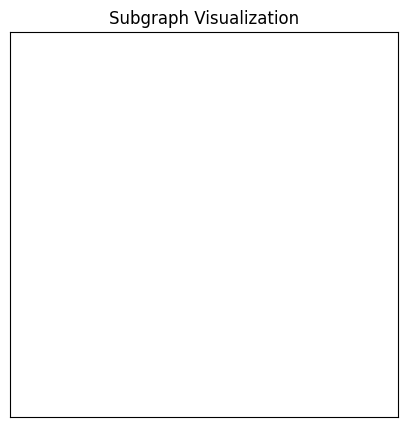

In [101]:
from torch_geometric.utils import subgraph, to_networkx
import networkx as nx

# Draw subgraph
plt.figure(figsize=(5, 5))
#nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=100, font_size=8)
plt.xticks([])
plt.yticks([])
plt.title("Subgraph Visualization")
plt.show()

## Training a Multi-layer Perception Network (MLP)

In theory, we should be able to infer the category of a neuron solely based on its content, *i.e.* its actvity feature representation, without taking any relational information into account.

Let's verify that by constructing a simple MLP that solely operates on input node features (using shared weights across all nodes):

In [103]:
import torch
from torch.nn import Linear

class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=5, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=5, bias=True)
)


Our MLP is defined by two linear layers and enhanced by [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html?highlight=relu#torch.nn.ReLU) non-linearity and [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html?highlight=dropout#torch.nn.Dropout).
Here, we first reduce the 1433-dimensional feature vector to a low-dimensional embedding (`hidden_channels=16`), while the second linear layer acts as a classifier that should map each low-dimensional node embedding to one of the 7 classes.

Let's train our simple MLP by following a similar procedure as described in [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8).
We again make use of the **cross entropy loss** and **Adam optimizer**.
This time, we also define a **`test` function** to evaluate how well our final model performs on the test node set (which labels have not been observed during training).

In [104]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(graph.x)  # Perform a single forward pass.
      loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.

      # --- Validation error ---
      model.eval()  # switch to eval mode (disables dropout, etc.)
      with torch.no_grad():
            pred = out.argmax(dim=1)
            val_pred = pred[graph.val_mask]
            val_true = graph.y[graph.val_mask]
            val_acc = (val_pred == val_true).float().mean().item()
    
      return loss.item(), val_acc

def test():
      model.eval()
      out = model(graph.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[graph.test_mask] == graph.y[graph.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(graph.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 1001):
    loss, val_acc = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, val_acc: {val_acc:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.6045, val_acc: 0.3686
Epoch: 002, Loss: 1.5908, val_acc: 0.3686
Epoch: 003, Loss: 1.5773, val_acc: 0.3686
Epoch: 004, Loss: 1.5640, val_acc: 0.4177
Epoch: 005, Loss: 1.5507, val_acc: 0.4300
Epoch: 006, Loss: 1.5376, val_acc: 0.4300
Epoch: 007, Loss: 1.5246, val_acc: 0.4300
Epoch: 008, Loss: 1.5116, val_acc: 0.4300
Epoch: 009, Loss: 1.4983, val_acc: 0.0663
Epoch: 010, Loss: 1.4846, val_acc: 0.0663
Epoch: 011, Loss: 1.4710, val_acc: 0.0614
Epoch: 012, Loss: 1.4570, val_acc: 0.6044
Epoch: 013, Loss: 1.4426, val_acc: 0.6044
Epoch: 014, Loss: 1.4278, val_acc: 0.6044
Epoch: 015, Loss: 1.4126, val_acc: 0.6044
Epoch: 016, Loss: 1.3970, val_acc: 0.6044
Epoch: 017, Loss: 1.3809, val_acc: 0.6044
Epoch: 018, Loss: 1.3643, val_acc: 0.6044
Epoch: 019, Loss: 1.3478, val_acc: 0.6044
Epoch: 020, Loss: 1.3314, val_acc: 0.6044
Epoch: 021, Loss: 1.3142, val_acc: 0.6044
Epoch: 022, Loss: 1.2967, val_acc: 0.6044
Epoch: 023, Loss: 1.2784, val_acc: 0.6044
Epoch: 024, Loss: 1.2599, val_acc:

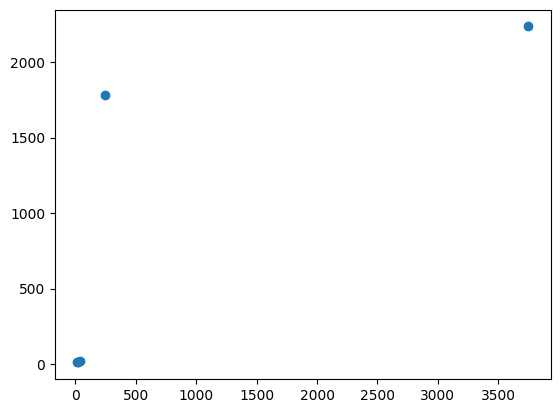

In [105]:
plt.scatter(torch.bincount(graph.y), 
                           torch.bincount(model(graph.x).argmax(dim=1)))

In [106]:
out = model(graph.x).argmax(dim=1)

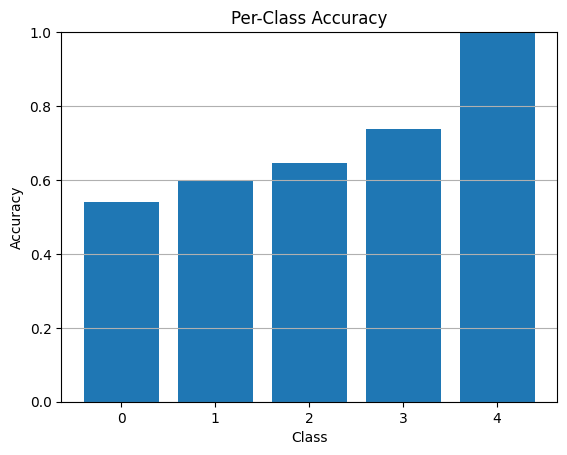

In [107]:
accuracies = []

for cls in range(num_classes):
    mask = graph.y == cls
    correct = (out[mask] == graph.y[mask]).sum()
    total = mask.sum()
    acc = correct / total if total > 0 else 0
    accuracies.append(acc)

plt.bar(range(num_classes), accuracies)
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [117]:
torch.bincount(graph.y)

tensor([  37, 3748,   17,   19,  245])

After training the model, we can call the `test` function to see how well our model performs on unseen labels.
Here, we are interested in the accuracy of the model, *i.e.*, the ratio of correctly classified nodes:

In [118]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.4194


## Training a Graph Neural Network (GNN)

We can easily convert our MLP to a GNN by swapping the `torch.nn.Linear` layers with PyG's GNN operators.

Following-up on [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8), we replace the linear layers by the [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv) module.
To recap, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)) is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \sum_{w \in \mathcal{N}(v) \, \cup \, \{ v \}} \frac{1}{c_{w,v}} \cdot \mathbf{x}_w^{(\ell)}
$$

where $\mathbf{W}^{(\ell + 1)}$ denotes a trainable weight matrix of shape `[num_output_features, num_input_features]` and $c_{w,v}$ refers to a fixed normalization coefficient for each edge.
In contrast, a single `Linear` layer is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \mathbf{x}_v^{(\ell)}
$$

which does not make use of neighboring node information.

In [119]:
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(5, 16)
  (conv2): GCNConv(16, 5)
)


In [120]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(graph.x, graph.edge_index)  # Perform a single forward pass.
      loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.

      # --- Validation error ---
      model.eval()  # switch to eval mode (disables dropout, etc.)
      with torch.no_grad():
            pred = out.argmax(dim=1)
            val_pred = pred[graph.val_mask]
            val_true = graph.y[graph.val_mask]
            val_acc = (val_pred == val_true).float().mean().item()
    
      return loss.item(), val_acc

def test():
      model.eval()
      out = model(graph.x, graph.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[graph.test_mask] == graph.y[graph.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(graph.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 1001):
    loss, val_acc = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, val_error: {val_acc:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.6175, val_error: 0.0049
Epoch: 002, Loss: 1.6101, val_error: 0.0098
Epoch: 003, Loss: 1.6044, val_error: 0.0197
Epoch: 004, Loss: 1.6000, val_error: 0.0197
Epoch: 005, Loss: 1.5962, val_error: 0.0319
Epoch: 006, Loss: 1.5925, val_error: 0.0393
Epoch: 007, Loss: 1.5888, val_error: 0.0393
Epoch: 008, Loss: 1.5849, val_error: 0.0442
Epoch: 009, Loss: 1.5810, val_error: 0.0786
Epoch: 010, Loss: 1.5770, val_error: 0.1400
Epoch: 011, Loss: 1.5731, val_error: 0.2162
Epoch: 012, Loss: 1.5693, val_error: 0.2776
Epoch: 013, Loss: 1.5655, val_error: 0.3268
Epoch: 014, Loss: 1.5617, val_error: 0.3538
Epoch: 015, Loss: 1.5578, val_error: 0.3636
Epoch: 016, Loss: 1.5539, val_error: 0.3587
Epoch: 017, Loss: 1.5499, val_error: 0.3366
Epoch: 018, Loss: 1.5458, val_error: 0.3170
Epoch: 019, Loss: 1.5418, val_error: 0.2998
Epoch: 020, Loss: 1.5377, val_error: 0.2776
Epoch: 021, Loss: 1.5336, val_error: 0.2580
Epoch: 022, Loss: 1.5293, val_error: 0.2506
Epoch: 023, Loss: 1.5250, val_er

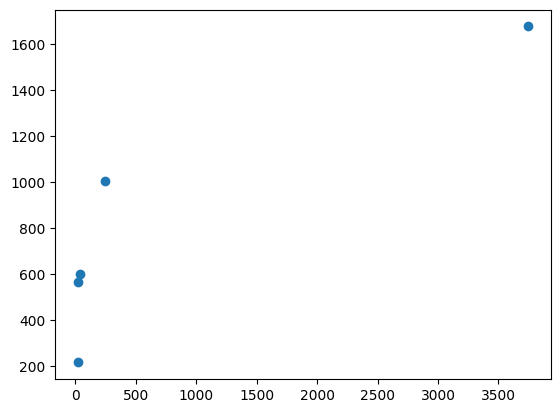

In [122]:
plt.scatter(torch.bincount(graph.y), 
                           torch.bincount(model(graph.x, graph.edge_index).argmax(dim=1)))

In [123]:
out = model(graph.x, graph.edge_index).argmax(dim=1)

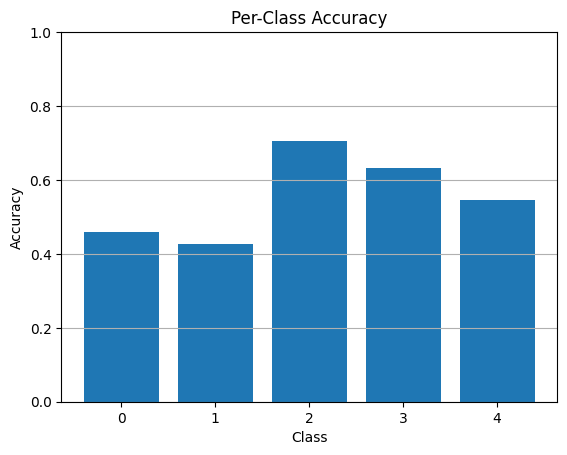

In [124]:
accuracies = []

for cls in range(num_classes):
    mask = graph.y == cls
    correct = (out[mask] == graph.y[mask]).sum()
    total = mask.sum()
    acc = correct / total if total > 0 else 0
    accuracies.append(acc)

plt.bar(range(num_classes), accuracies)
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [125]:
torch.bincount(graph.y)

tensor([  37, 3748,   17,   19,  245])

After training the model, we can check its test accuracy:

In [126]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.4194


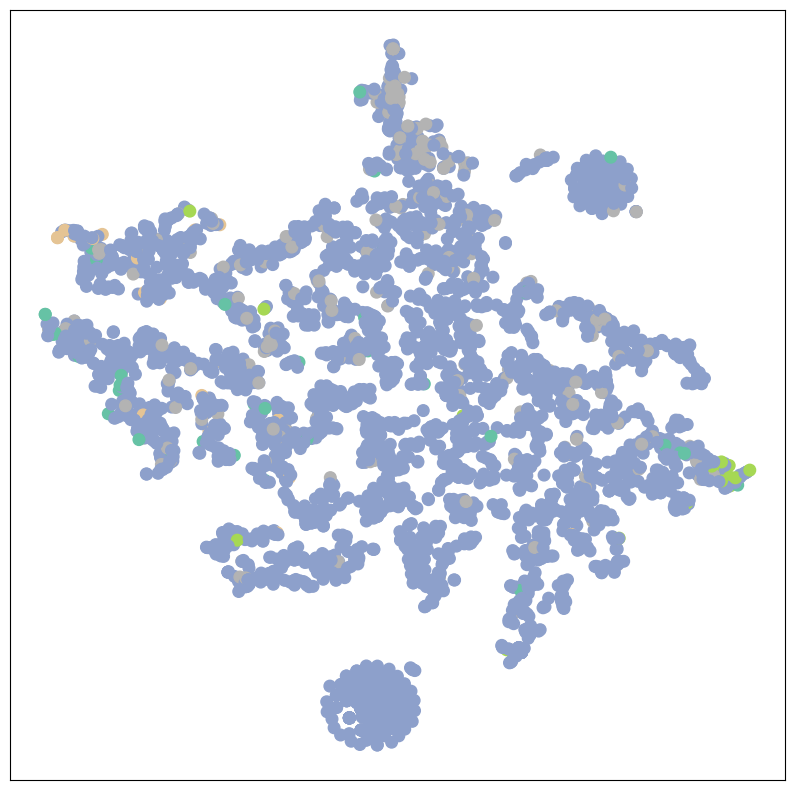

In [127]:
model.eval()

out = model(graph.x, graph.edge_index)
visualize(out, color=graph.y)

In [128]:
from torch_geometric.nn import GATConv

# Assuming num_features and num_classes are defined globally
# e.g., num_features = dataset.num_features, num_classes = dataset.num_classes

class GAT(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GATConv(num_features, hidden_channels, heads=8, dropout=0.0)
        # Output dim of conv1 is hidden_channels * heads, so we set in_channels accordingly
        self.conv2 = GATConv(hidden_channels * 8, num_classes, heads=1, concat=False, dropout=0.0)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = self.conv2(x, edge_index)
        return x

model = GAT(hidden_channels=16)
print(model)

GAT(
  (conv1): GATConv(5, 16, heads=8)
  (conv2): GATConv(128, 5, heads=1)
)


In [129]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GAT(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(graph.x, graph.edge_index)  # Perform a single forward pass.
      loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.

      # --- Validation error ---
      model.eval()  # switch to eval mode (disables dropout, etc.)
      with torch.no_grad():
            pred = out.argmax(dim=1)
            val_pred = pred[graph.val_mask]
            val_true = graph.y[graph.val_mask]
            val_acc = (val_pred == val_true).float().mean().item()
    
      return loss.item(), val_acc

def test():
      model.eval()
      out = model(graph.x, graph.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[graph.test_mask] == graph.y[graph.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(graph.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 1001):
    loss, val_acc = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, val_error: {val_acc:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.6221, val_error: 0.8698
Epoch: 002, Loss: 1.5962, val_error: 0.0934
Epoch: 003, Loss: 1.5858, val_error: 0.0172
Epoch: 004, Loss: 1.5735, val_error: 0.0221
Epoch: 005, Loss: 1.5580, val_error: 0.1032
Epoch: 006, Loss: 1.5427, val_error: 0.4251
Epoch: 007, Loss: 1.5297, val_error: 0.7961
Epoch: 008, Loss: 1.5186, val_error: 0.8059
Epoch: 009, Loss: 1.5080, val_error: 0.7789
Epoch: 010, Loss: 1.4969, val_error: 0.7346
Epoch: 011, Loss: 1.4857, val_error: 0.7174
Epoch: 012, Loss: 1.4750, val_error: 0.7125
Epoch: 013, Loss: 1.4654, val_error: 0.6806
Epoch: 014, Loss: 1.4572, val_error: 0.6339
Epoch: 015, Loss: 1.4499, val_error: 0.6069
Epoch: 016, Loss: 1.4423, val_error: 0.5872
Epoch: 017, Loss: 1.4339, val_error: 0.5971
Epoch: 018, Loss: 1.4244, val_error: 0.6044
Epoch: 019, Loss: 1.4142, val_error: 0.6585
Epoch: 020, Loss: 1.4037, val_error: 0.6880
Epoch: 021, Loss: 1.3925, val_error: 0.6978
Epoch: 022, Loss: 1.3805, val_error: 0.7174
Epoch: 023, Loss: 1.3675, val_er

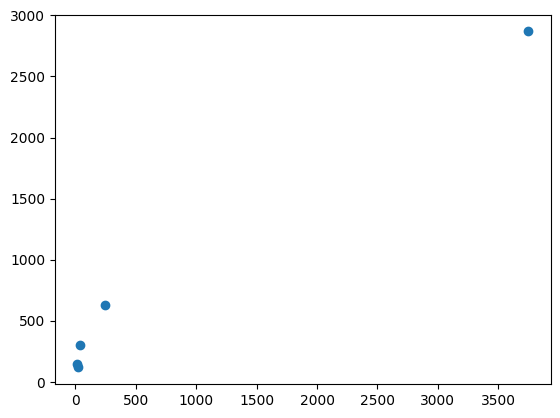

In [131]:
plt.scatter(torch.bincount(graph.y), 
                           torch.bincount(model(graph.x, graph.edge_index).argmax(dim=1)))

In [132]:
out = model(graph.x, graph.edge_index).argmax(dim=1)

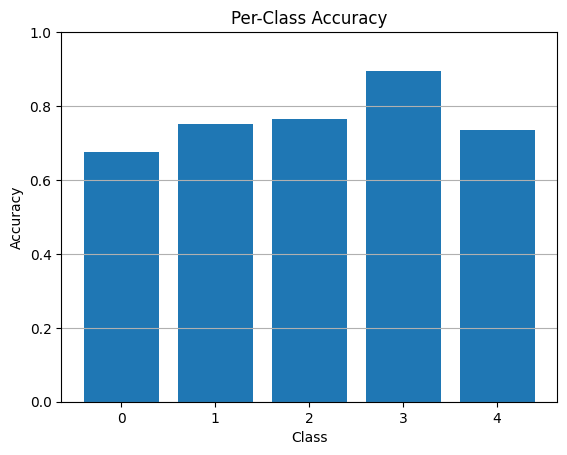

In [133]:
accuracies = []

for cls in range(num_classes):
    mask = graph.y == cls
    correct = (out[mask] == graph.y[mask]).sum()
    total = mask.sum()
    acc = correct / total if total > 0 else 0
    accuracies.append(acc)

plt.bar(range(num_classes), accuracies)
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [134]:
torch.bincount(graph.y)

tensor([  37, 3748,   17,   19,  245])

In [135]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7454


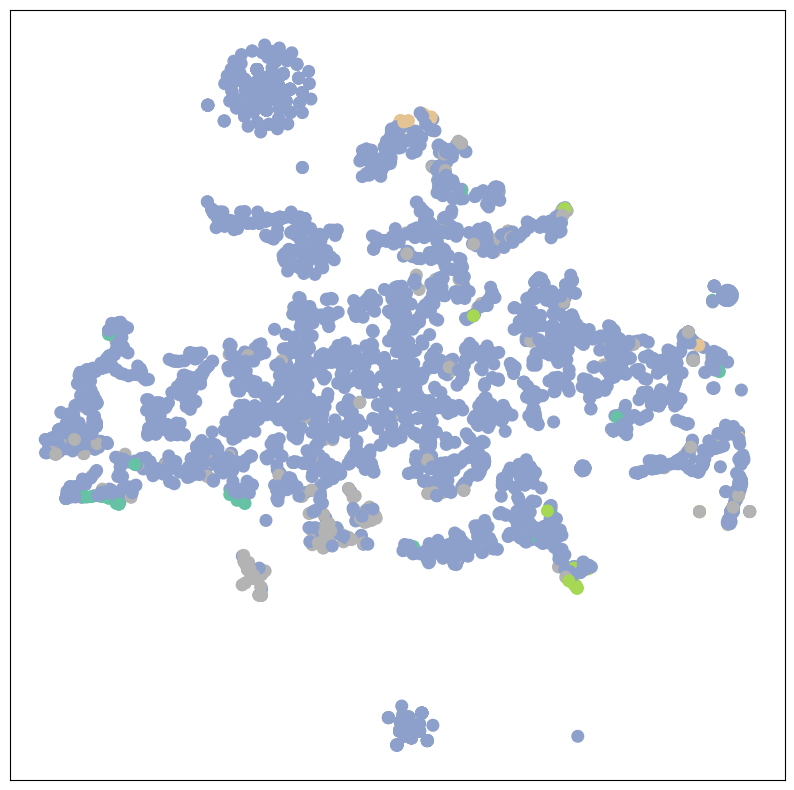

In [136]:
model.eval()

out = model(graph.x, graph.edge_index)
visualize(out, color=graph.y)